# Advanced Business Analytics (CIS442D)

## Homework Assignment 6
### Due date: 2/27/2017 23:55
### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.
---

# Exercise 1: Image segmentation (clustering)

In this exercise, you will apply the K-Means and Hierarchichal clustering algorithm to an image of your choice. 
1. Load a color image to a numpy array using the function imread (see the lecture notebook for the exact syntax). 
2. Plot the image (represented as array) using the command imshow.
3. What are the dimensions of the array? what is the total number of pixels? what are the maximal and minimal values of the array?
4. Convert the previous array to a 2-dimensional array where each row corresponds to a pixel, and there are 3 columns corresponding to the intensities of the colors Red, Green, and Blue.
5. Apply the K-Mean algorithm with K=2 and answer the following questions:
  1. What are the colors of the first and second pixels?
  2. Which clusters are associated with the first and second pixels?
  3. Plot the colors of the centroids returned by the K-Mean algorithm
  4. Plot the segmented image (that is, the original image after the color of each pixel is transformed into the nearest centroid)
6. (optional) Repeat 5, this time applying the hierarchichal clustering algorithm:
  1. Randomly sample 1000 points from the image (you may use numpy.random.choice)
  2. Apply hierarchichal clustering
  3. Compute the centroids of each cluster
  4. Compute the distance between each data point (pixel) and the centroids (you may use the function scipy.spatial.distance.cdist)
  5. Transform each pixel to the nearest centroid
  6. Plot the segmented image
    

In [83]:
import numpy as np
import pandas as pd
import scipy 
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import misc
from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn import cluster
from sklearn import svm
from sklearn import datasets
from sklearn import mixture
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import axes3d
from ipywidgets import interact
from matplotlib import cm
from matplotlib.colors import LogNorm
np.set_printoptions(precision=1)
%matplotlib inline

In [7]:
#1.Load a color image to a numpy array using the function imread 
Image("ny.jpg")
a = misc.imread("ny.jpg",mode='RGB')

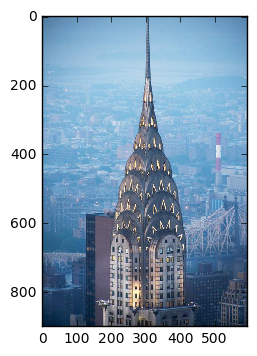

In [6]:
#2.Plot the image (represented as array) using the command imshow
plt.imshow(a)

In [11]:
#3.What are the dimensions of the array? 
#what is the total number of pixels? 
#what are the maximal and minimal values of the array?
a.shape

#dimensions are 900,596,3
#total number of pixels are 900*596= 536400

(900, 596, 3)

In [12]:
#4.Convert the previous array to a 2-dimensional array where each row 
#corresponds to a pixel, and there are 3 columns corresponding to the 
#intensities of the colors Red, Green, and Blue.
rows,cols,depth=a.shape
a1 = a.reshape(rows*cols,depth)
a1.shape

(536400, 3)

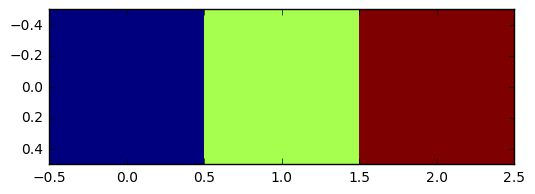

In [28]:
#5.Apply the K-Mean algorithm with K=2 and answer the following questions:
#What are the colors of the first and second pixels?
plt.imshow([a1[0,:]], interpolation='nearest',)
plt.imshow([a1[1,:]], interpolation='nearest',)

In [51]:
#Which clusters are associated with the first and second pixels?
kmeans.predict(a1[0,:])
kmeans.predict(a1[1,:])


/Users/victoria/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/victoria/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1], dtype=int32)

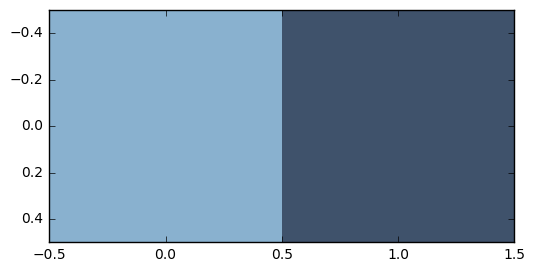

In [19]:
#Plot the colors of the centroids returned by the K-Mean algorithm
kmeans = cluster.KMeans(n_clusters=2).fit(a1)
np.unique(kmeans.labels_)
kmeans.cluster_centers_
plt.imshow([kmeans.cluster_centers_.astype(np.uint8)], interpolation='nearest',)

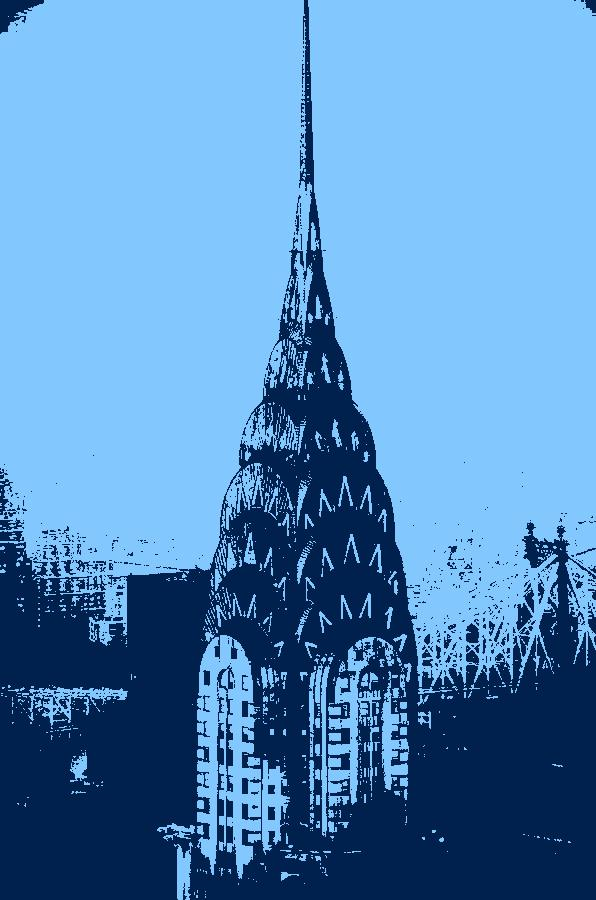

In [22]:
#Plot the segmented image (that is, the original image after the color of
#each pixel is transformed into the nearest centroid)
a2 = np.array([kmeans.cluster_centers_[c,:] for c in kmeans.predict(a1)]).reshape((rows,cols,depth))
misc.imsave('segmented_ny.jpg',a2)
Image('segmented_ny.jpg')

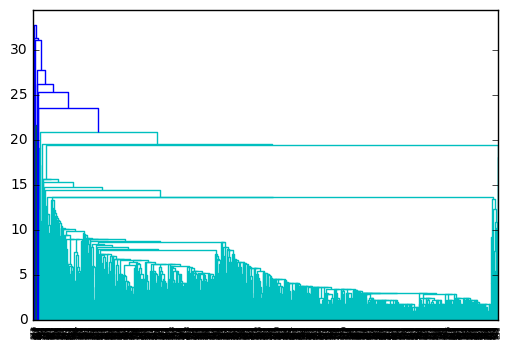

In [96]:
#(optional) Repeat 5, this time applying the hierarchichal clustering algorithm:
#Randomly sample 1000 points from the image (you may use numpy.random.choice)
#Apply hierarchichal clustering
#Compute the centroids of each cluster
#Compute the distance between each data point (pixel) and the centroids (you may use the function scipy.spatial.distance.cdist)
#Transform each pixel to the nearest centroid
#Plot the segmented image
random_choice = np.random.choice(536400, 1000, replace=False)

distance_matrix = scipy.spatial.distance.pdist(a1[random_choice])
distance_matrix

Z = hierarchy.linkage(distance_matrix,method='single',metric='euclidean')
Z

dn = hierarchy.dendrogram(Z)

In [97]:
T = hierarchy.cut_tree(Z, n_clusters=[10])
T

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

# Exercise 2: digit recognition (classification)
The sklearn.datasets package embeds some small toy datasets (http://scikit-learn.org/stable/datasets/). The dataset digits contains 1797 images of digits, represented as arrays of pixels, and the actual label (that is, the digit depicted in the image) of each image.

1. Run the command: digits = datasets.load_digits() to load images of digits (make sure to import the proper package)
2. Describe the attribute digits.data
3. Describe the attribute digits.images
4. Choose a random number x between 0-1797 (that is, choose a random image). 
    1. Plot image x
    2. Print the corresponding label
5. Split the data to training and test sets. 
6. Use the training set to fit a classification tree of maximal depth 1.
7. Choose a data point (image) in the test set, and predict its value using the classifier:
    1. Plot the image
    2. Print the label
    3. Print the prediction for the image (that is, the prediction for the digit depicted in the image)
8. Use cross validation to evaluate the quality of the classifier
9. Plot the classification tree
10. Fit the training data using a support vector classifier
11. Use cross validation to evaluate the quality of the support vector classifier
12. Which classifier would you use to recognize digits? explain your findings

In [34]:
#1.Run the command: digits = datasets.load_digits() to load images of 
#digits (make sure to import the proper package)
digits = datasets.load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [39]:
#2.Describe the attribute digits.data

digits.data
len(digits.data)

#the attribute 'data' holds a flat representation of each image, and there
#are 1797 images incuded here.

1797

In [40]:
#3.Describe the attribute digits.images

digits.images
len(digits.images)

#the attribute 'image' holds each image as a matrix, and there are 1797 
#images incuded here.

1797

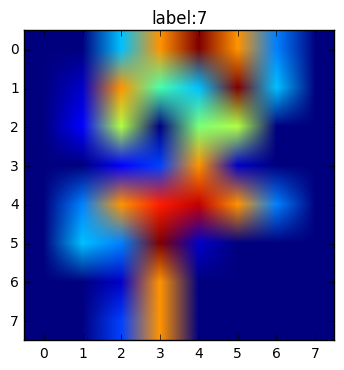

In [68]:
#4.Choose a random number x between 0-1797 (that is, choose a random image).
#Plot image x
#Print the corresponding label
random = np.random.choice(1797, 1, replace=False)

plt.imshow(digits.images[random[0]])
plt.gca().set_title('label:' + str(digits.target[random[0]]))

In [52]:
#5.Split the data to training and test sets.
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1078, 64) (719, 64) (1078,) (719,)


In [53]:
#6.Use the training set to fit a classification tree of maximal depth 1.
clf = tree.DecisionTreeRegressor(max_depth =1)
clf = clf.fit(X_train,Y_train)

/Users/victoria/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 3.8])

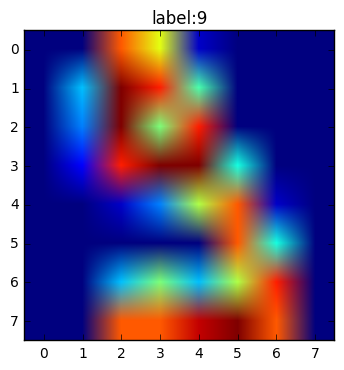

In [75]:
#7.Choose a data point (image) in the test set, and predict its value using the classifier:
#Plot the image
#Print the label
#Print the prediction for the image (that is, the prediction for the digit
#depicted in the image)
random_test = np.random.choice(len(X_test), 1, replace=False)
random_test
plt.imshow(digits.images[random_test[0]])
plt.gca().set_title('label:' + str(digits.target[random_test[0]]))

clf.predict(X_test[random_test[0]])

In [78]:
#8.Use cross validation to evaluate the quality of the classifier
scores = cross_val_score(clf,X_train,Y_train,cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.1  0.1  0.2  0.1  0.1]
Accuracy: 0.12 (+/- 0.03)


In [ ]:
#9.Plot the classification tree
with open("tree_stump.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f, filled=True, label='all')
    
pydot.graph_from_dot_file('tree_stump.dot').write_pdf('tree_stump.pdf') 
IFrame('tree_stump.pdf', width=400, height=350) 

In [79]:
#10.Fit the training data using a support vector classifier
clf1 = svm.SVC(kernel='linear')

In [80]:
#11.Use cross validation to evaluate the quality of the support vector 
#classifier
scores1 = cross_val_score(clf1, X_train,Y_train, cv=5)
print(scores1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))

[ 1.  1.  1.  1.  1.]
Accuracy: 0.97 (+/- 0.01)


In [ ]:
#12.Which classifier would you use to recognize digits? explain your 
#findings

#I would recommend the support vector classifier since its accuracy is 
#much higher than that of trees.

# Optional coding assignment
This is an __optional__ exercise, which will be graded and counted towards the class participation component of your grade (it could only improve your grade).

Read the first chapter in https://automatetheboringstuff.com/chapter4/ and solve the practice quetsions appearing at the end of the chapter.

In [ ]:
# Solution to Q1

In [ ]:
# Solution to Q2

In [ ]:
# Solution to Q3

In [ ]:
# Solution to Q4

In [ ]:
# Solution to Q5

In [ ]:
# Solution to Q6

In [ ]:
# Solution to Q7

In [ ]:
# Solution to Q8

In [ ]:
# Solution to Q9

In [ ]:
# Solution to Q10

In [ ]:
# Solution to Q11

In [ ]:
# Solution to Q12

In [ ]:
# Solution to Q13

In [ ]:
# Solution to Q14

In [ ]:
# Solution to Q15

In [ ]:
# Solution to Q16

In [ ]:
# Solution to Q17

In [ ]:
# Solution to practice project 1

In [ ]:
# Solution to practice project 2